# **Proyecto Final Violencia policial raciales y etnicas en EE.UU**

Estudiantes:

* Diana Carolina Rodriguez Botina - Código: 20212678016
- John Edward León Muñoz - Código: 20212678013


**Problematica:**

En EE.UU desde el 2015, muchos de los enfrentamientos policiales se mostraron como circunstancias diferentes a la de combatir un delito,
donde la policia estuvo involucrada en muertes con factores significativos como disparidades raciales, disparidades étnicas, el uso de fuerza letal,
patrones de violencia policial en función de ubicación geográfica y otras variables demográficas.

**Se realizara un analisis que puede ayudar a identificar, ¿Es posible predecir a que tipo de poblacion la policia afectara mas, por mal uso de la fuerza?
y ¿que agencias estan mas involucradas con esta problematica en los EE.UU?.**

In [ ]:
##Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import OneClassSVM

In [ ]:
#Se importa el dataset en archivos locales
#df = pd.read_csv('fatal-police-shootings-data.csv', on_bad_lines='skip', delimiter=';')

#se importa el datset desde github
url_data = 'https://raw.githubusercontent.com/DianaR24/Abuso_policial/main/fatal-police-shootings-data.csv';
df = pd.read_csv(url_data, delimiter=';');

In [ ]:
##Mostramos el df relacionado con los policias
print('La cantidad de registros del dataset son: ',df.shape[0],' registros')

La cantidad de registros del dataset son:  8727  registros


In [ ]:
df= df.rename(columns={"id":"Id","date":"Fecha","manner_of_death":"Manera_de_morir","threat_type":"Tipo_Amenaza","flee_status":"Estado_huida","armed_with":"Armado_con","city":"Ciudad","county":"Condado","state":"Estado","latitude":"Latitud","longitude":"Longitud","location_precision":"Ubicacion_exacta","name":"Nombre","age":"Edad","gender":"Genero","race":"Raza","race_source":"Fuente_Raza","was_mental_illness_related":"Enfermedad_mental_relacionada","body_camera":"Camara_corporal","agency_ids":"Id_agencias","Police_misuse":"Abuso_policial"})

In [ ]:
df

,Id,Fecha,Nombre,Manera_de_morir,Tipo_Amenaza,Estado_huida,Armado_con,Ciudad,Condado,Estado,...,Ubicacion_exacta,Edad,Genero,Raza,Fuente_Raza,Enfermedad_mental_relacionada,Camara_corporal,Id_agencias,Nombre_agencia,Abuso_policial
0,3,2/01/2015,Tim Elliot,shot,point,not,gun,Shelton,Mason,WA,...,not_available,53.0,male,A,not_available,True,False,73.0,Allegheny County Port Authority,Yes
1,4,2/01/2015,Lewis Lee Lembke,shot,point,not,gun,Aloha,Washington,OR,...,not_available,47.0,male,W,not_available,False,False,70.0,Alleghany County Sheriff's Office,Yes
2,5,3/01/2015,John Paul Quintero,shot and Tasered,move,not,unarmed,Wichita,Sedgwick,KS,...,not_available,23.0,male,H,not_available,False,False,238.0,Austin Police Department,Yes
3,8,4/01/2015,Matthew Hoffman,shot,point,not,replica,San Francisco,San Francisco,CA,...,not_available,32.0,male,W,not_available,True,False,196.0,Assumption Parish Sheriff's Office,Yes
4,9,4/01/2015,Michael Rodriguez,shot,point,not,other,Evans,Weld,CO,...,not_available,39.0,male,H,not_available,False,False,473.0,Bloomingdale Police Department,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9474,23/08/2023,NaN,shot and Tasered,threat,foot,gun,Aurora,Adams,CO,...,intersection,NaN,male,NaN,NaN,False,True,21.0,Adams County Sheriff's Office,Yes
8723,9475,20/08/2023,Peter Corey,shot and Tasered,attack,not,unknown,Charlotte,Mecklenburg,NC,...,address,NaN,male,NaN,NaN,False,False,354.0,Bell Police Department,Yes
8724,9476,25/08/2023,NaN,shot and Tasered,NaN,NaN,undetermined,Charlotte,Mecklenburg,NC,...,block,NaN,male,NaN,NaN,False,False,354.0,Bell Police Department,Yes
8725,9477,28/08/2023,Thomas Michael Carney,shot and Tasered,shoot,foot,gun,Lehigh Acres,Lee,FL,...,intersection,28.0,male,NaN,NaN,False,False,1525.0,Gilroy Police Department,Yes


# **Analisis Exploratorio de los datos**

**Analisis Visual**

- Hay registros que no tienen la informacion completa
- La mayoria de los estados de huidas son "no" o estan vacios los registros
- 1500 del total de los registros no tienen la raza
- El arma mas comun en los registros son cuchillos
- En el estado de California es donde mas casos se registraron
- La precision de la localizacion esta como not_available "No disponible" en la 10ma parte de los registros
- Los estados de EEUU estan con siglas y no por nombre
- Las armas estan en texto y no de tipo numerico
- No se puede hacer la correlacion porque muchos de los campos son texto
- Solo hay 2 maneras de morir, por disparo o por teaser
- Hay muy pocos registros de que no hubo abuso policial

In [ ]:
df.head()

,Id,Fecha,Nombre,Manera_de_morir,Tipo_Amenaza,Estado_huida,Armado_con,Ciudad,Condado,Estado,...,Ubicacion_exacta,Edad,Genero,Raza,Fuente_Raza,Enfermedad_mental_relacionada,Camara_corporal,Id_agencias,Nombre_agencia,Abuso_policial
0,3,2/01/2015,Tim Elliot,shot,point,not,gun,Shelton,Mason,WA,...,not_available,53.0,male,A,not_available,True,False,73.0,Allegheny County Port Authority,Yes
1,4,2/01/2015,Lewis Lee Lembke,shot,point,not,gun,Aloha,Washington,OR,...,not_available,47.0,male,W,not_available,False,False,70.0,Alleghany County Sheriff's Office,Yes
2,5,3/01/2015,John Paul Quintero,shot and Tasered,move,not,unarmed,Wichita,Sedgwick,KS,...,not_available,23.0,male,H,not_available,False,False,238.0,Austin Police Department,Yes
3,8,4/01/2015,Matthew Hoffman,shot,point,not,replica,San Francisco,San Francisco,CA,...,not_available,32.0,male,W,not_available,True,False,196.0,Assumption Parish Sheriff's Office,Yes
4,9,4/01/2015,Michael Rodriguez,shot,point,not,other,Evans,Weld,CO,...,not_available,39.0,male,H,not_available,False,False,473.0,Bloomingdale Police Department,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             8727 non-null   int64  
 1   Fecha                          8727 non-null   object 
 2   Nombre                         8057 non-null   object 
 3   Manera_de_morir                8727 non-null   object 
 4   Tipo_Amenaza                   8687 non-null   object 
 5   Estado_huida                   7550 non-null   object 
 6   Armado_con                     8517 non-null   object 
 7   Ciudad                         8568 non-null   object 
 8   Condado                        3844 non-null   object 
 9   Estado                         8622 non-null   object 
 10  Latitud                        7658 non-null   object 
 11  Longitud                       7658 non-null   object 
 12  Ubicacion_exacta               7658 non-null   o

# **Pre-procesamiento**

In [ ]:
df.shape

(8727, 22)

In [ ]:
##Se revisa los datos duplicados
print('Registros duplicados: ',df.duplicated().sum())

Registros duplicados:  0


In [ ]:
##Se revisa si hay datos nulos
print('Registros nulos por columnas: ',df.isna().sum())

Registros nulos por columnas:  Id                                  0
Fecha                               0
Nombre                            670
Manera_de_morir                     0
Tipo_Amenaza                       40
Estado_huida                     1177
Armado_con                        210
Ciudad                            159
Condado                          4883
Estado                            105
Latitud                          1069
Longitud                         1069
Ubicacion_exacta                 1069
Edad                              698
Genero                            151
Raza                             1481
Fuente_Raza                      1460
Enfermedad_mental_relacionada     106
Camara_corporal                   106
Id_agencias                       108
Nombre_agencia                    111
Abuso_policial                      0
dtype: int64


In [ ]:
df.isnull().mean()*100 #Validar el porcentaje

Id                                0.000000
Fecha                             0.000000
Nombre                            7.677323
Manera_de_morir                   0.000000
Tipo_Amenaza                      0.458348
Estado_huida                     13.486880
Armado_con                        2.406325
Ciudad                            1.821932
Condado                          55.952790
Estado                            1.203163
Latitud                          12.249341
Longitud                         12.249341
Ubicacion_exacta                 12.249341
Edad                              7.998167
Genero                            1.730262
Raza                             16.970322
Fuente_Raza                      16.729689
Enfermedad_mental_relacionada     1.214621
Camara_corporal                   1.214621
Id_agencias                       1.237539
Nombre_agencia                    1.271915
Abuso_policial                    0.000000
dtype: float64

In [ ]:
df.dtypes

Id                                 int64
Fecha                             object
Nombre                            object
Manera_de_morir                   object
Tipo_Amenaza                      object
Estado_huida                      object
Armado_con                        object
Ciudad                            object
Condado                           object
Estado                            object
Latitud                           object
Longitud                          object
Ubicacion_exacta                  object
Edad                             float64
Genero                            object
Raza                              object
Fuente_Raza                       object
Enfermedad_mental_relacionada     object
Camara_corporal                   object
Id_agencias                      float64
Nombre_agencia                    object
Abuso_policial                    object
dtype: object

In [ ]:
##Conversion de la columna fecha de tipo Object a tipo Date
df['Fecha'] = pd.to_datetime(df['Fecha'])

##Se remplezan los datos nulos por el valor 0 en la columna id_agencias
df['Id_agencias']= df['Id_agencias'].fillna(0)
df['Edad']= df['Edad'].fillna(0)
df['Tipo_Amenaza']= df['Tipo_Amenaza'].fillna(0)
df['Estado_huida']= df['Estado_huida'].fillna(0)
df['Armado_con']= df['Armado_con'].fillna(0)
df['Ciudad']= df['Ciudad'].fillna(0)
df['Condado']= df['Condado'].fillna(0)
df['Estado']= df['Estado'].fillna(0)
df['Latitud']= df['Latitud'].fillna(0)
df['Longitud']= df['Longitud'].fillna(0)
df['Ubicacion_exacta']= df['Ubicacion_exacta'].fillna(0)
df['Nombre']= df['Nombre'].fillna(0)
df['Genero']= df['Genero'].fillna(0)
df['Raza']= df['Raza'].fillna(0)
df['Fuente_Raza']= df['Fuente_Raza'].fillna(0)
df['Enfermedad_mental_relacionada']= df['Enfermedad_mental_relacionada'].fillna(0)
df['Camara_corporal']= df['Camara_corporal'].fillna(0)
df['Nombre_agencia']= df['Nombre_agencia'].fillna(0)
df['Abuso_policial']= df['Abuso_policial'].fillna(0)


#Conversion de los tipos de datos
df['Id_agencias'] = df['Id_agencias'].astype(int)
df['Edad'] = df['Edad'].astype(int)

#Se categorizan algunas columnas
#vacio=0, accident=1, attack=2, flee=3, move=4, point=5, shoot=6, threat=7, undetermined=8
df['Tipo_Amenaza']= df['Tipo_Amenaza'].replace({"accident":1,"attack":2,"flee":3,"move":4,"point":5,"shoot":6,"threat":7,"undetermined":8})
df['Tipo_Amenaza'] = df['Tipo_Amenaza'].astype(int)

#vacio=0, car=1,foot=2,not=3,other=4
df['Estado_huida']= df['Estado_huida'].replace({"car":1,"foot":2, "not":3, "other":4})
df['Estado_huida'] = df['Estado_huida'].astype(int)

#vacio=0, blunt_object=1,gun=2,knife=3,other=4,replica=5,unarmed=6,undetermined=7,unknown=8,vehicle=9
df['Armado_con']= df['Armado_con'].replace({"blunt_object":1,"gun":2,"knife":3,"other":4,"replica":5,"unarmed":6,"undetermined":7,"unknown":8,"vehicle":9})
df['Armado_con'] = df['Armado_con'].astype(int)

#vacio=0, address=1,block=2,intersection=3,not_available=4,poi_large=5,poi_small=6,road=7
df['Ubicacion_exacta']= df['Ubicacion_exacta'].replace({"address":1,"block":2,"intersection":3,"not_available":4,"poi_large":5,"poi_small":6,"road":7})
df['Ubicacion_exacta'] = df['Ubicacion_exacta'].astype(int)

#vacio=0, female=1, male=2, non-binary=3
df['Genero']= df['Genero'].replace({"female":1,"male":2,"non-binary":3})
df['Genero'] = df['Genero'].astype(int)

#vacio=0, (Alaska-Asiatico) A=1,(Negro)B=2,(Hispano)H=3,(Nativo)N=4,(Otros)O=5,(Blanco)W=6
df['Raza']= df['Raza'].replace({"A":1,"B":2,"H":3,"N":4,"O":5,"W":6})
df['Raza'] = df['Raza'].astype(int)

#vacio=0, clip=1,not_available=2,other=3,photo=4,public_record=5,undetermined=6
df['Fuente_Raza']= df['Fuente_Raza'].replace({"clip":1,"not_available":2,"other":3,"photo":4,"public_record":5,"undetermined":6})
df['Fuente_Raza'] = df['Fuente_Raza'].astype(int)


#vacio=0, True=1, False=2
df['Enfermedad_mental_relacionada']= df['Enfermedad_mental_relacionada'].replace({"True":1,"False":2})
df['Enfermedad_mental_relacionada'] = df['Enfermedad_mental_relacionada'].astype(int)

#vacio=0, True=1, False=2
df['Camara_corporal']= df['Camara_corporal'].replace({"True":1,"False":2})
df['Camara_corporal'] = df['Camara_corporal'].astype(int)

#vacio=0, shot=1, shot_and_Tasered=2
df['Manera_de_morir']= df['Manera_de_morir'].replace({"shot":1,"shot and Tasered":2})
df['Manera_de_morir'] = df['Manera_de_morir'].astype(int)

#No=0, yes=1
df['Abuso_policial']= df['Abuso_policial'].replace({"No":0,"Yes":1})
df['Abuso_policial'] = df['Abuso_policial'].astype(int)

df.dtypes

<ipython-input-54-878ad564b6c2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Fecha'] = pd.to_datetime(df['Fecha'])


Id                                        int64
Fecha                            datetime64[ns]
Nombre                                   object
Manera_de_morir                           int64
Tipo_Amenaza                              int64
Estado_huida                              int64
Armado_con                                int64
Ciudad                                   object
Condado                                  object
Estado                                   object
Latitud                                  object
Longitud                                 object
Ubicacion_exacta                          int64
Edad                                      int64
Genero                                    int64
Raza                                      int64
Fuente_Raza                               int64
Enfermedad_mental_relacionada             int64
Camara_corporal                           int64
Id_agencias                               int64
Nombre_agencia                          

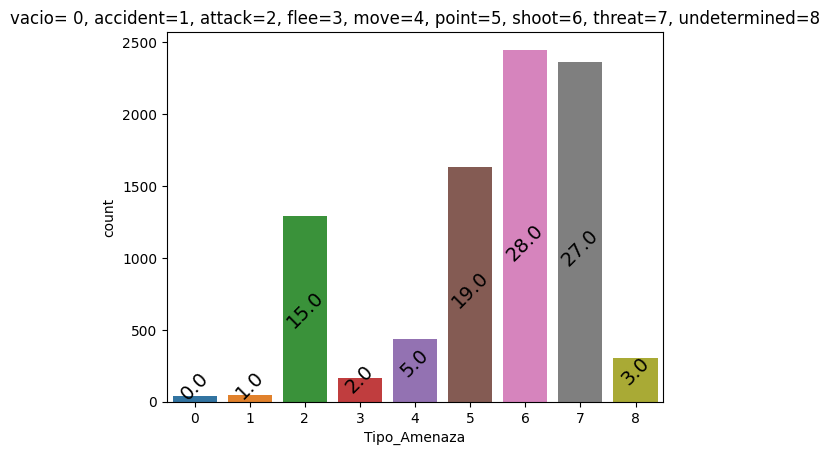

In [ ]:
counts = df['Tipo_Amenaza'].value_counts()
perc = round((counts/counts.sum())*100)

amenaza_plot = sns.countplot(x='Tipo_Amenaza', data=df )
for i in range(len(counts)):
    amenaza_plot.text(i,counts[i]/2.5,perc[i],
                  fontdict=dict(color='black',fontsize=14),
                  horizontalalignment='center', rotation=45)

plt.title('vacio= 0, accident=1, attack=2, flee=3, move=4, point=5, shoot=6, threat=7, undetermined=8')
plt.show()

In [ ]:
#este bloque de codigo ocuerre porque no hay mas parametros para graficar que solo un valor en este caso es solo 1
#counts = df['Abuso_policial'].value_counts()
#perc = round((counts/counts.sum())*100)

#Arroja error ya que solo se cuenta con un valor en abuso policial que es 1 = si
#abuso_plot = sns.countplot(x='Abuso_policial', data=df )
#for i in range(len(counts)):
 #   abuso_plot.text(i,counts[i]/2.5,perc[i],
  #                fontdict=dict(color='black',fontsize=14),
   #               horizontalalignment='center', rotation=45)

#plt.title('Abuso Policial - No= 0, Si=1')
#plt.show()

<ipython-input-57-a0d26d606a61>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(grid[0])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


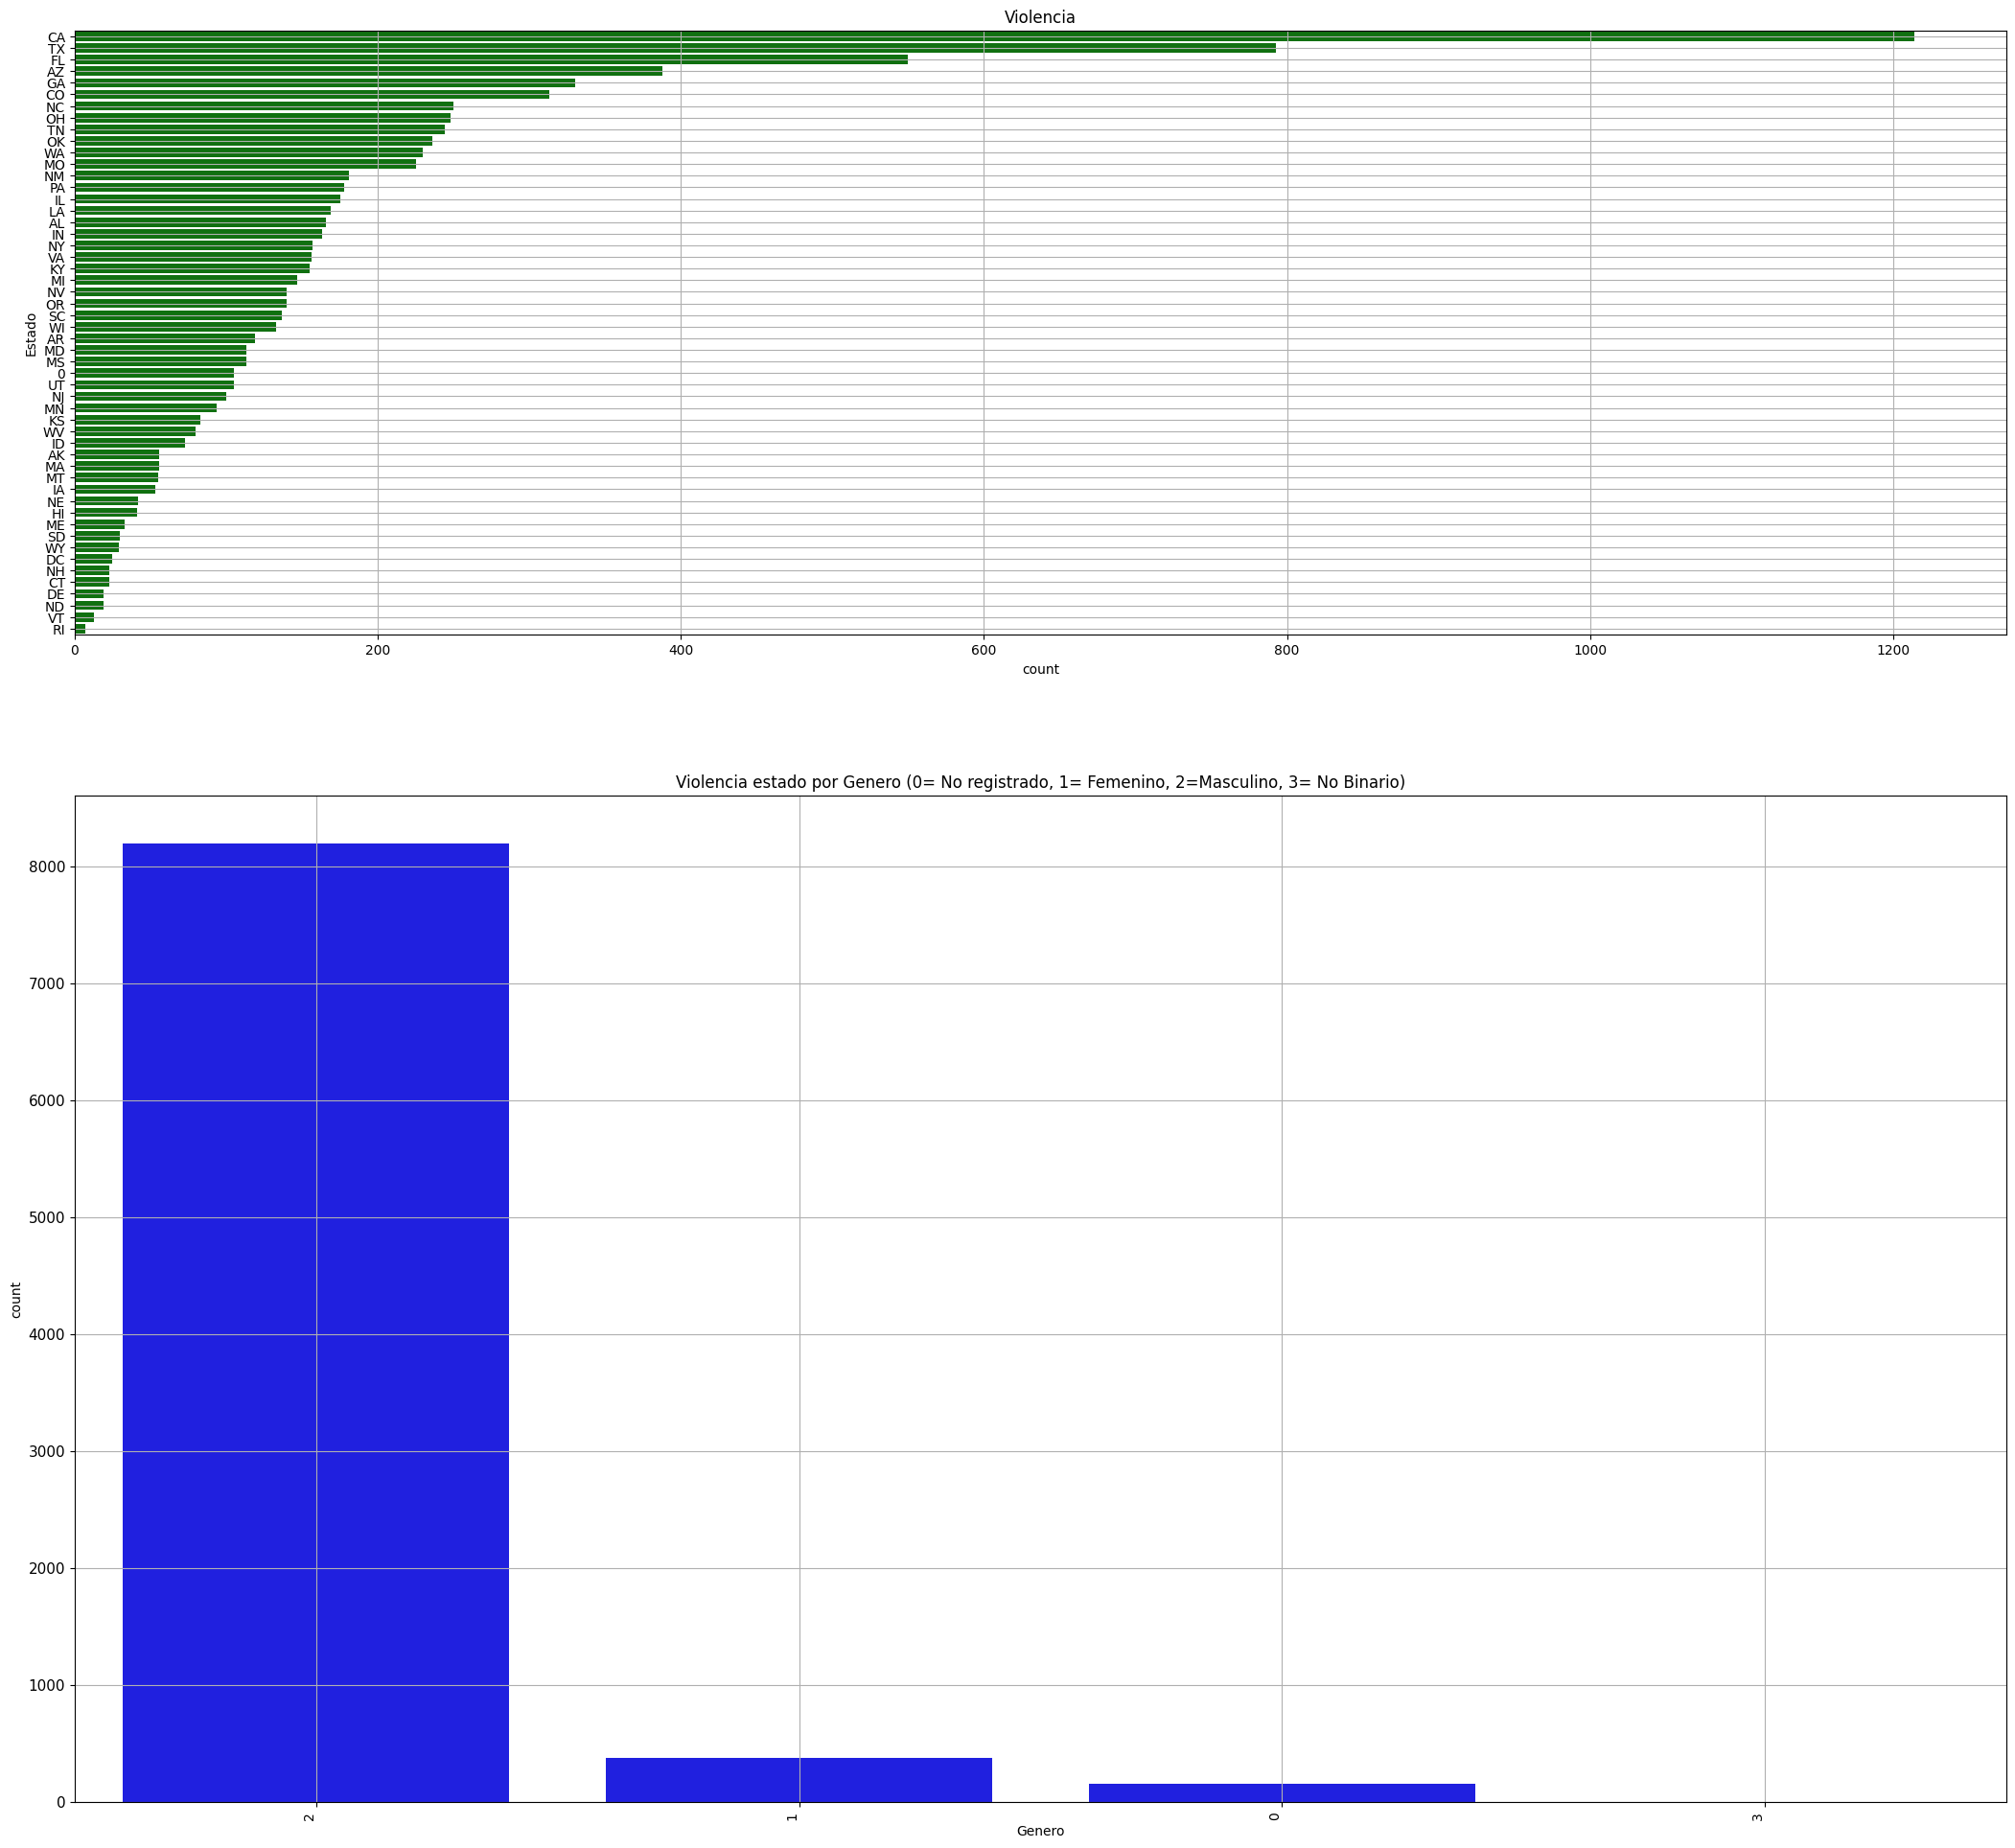

In [ ]:
fig= plt.subplots(figsize=(26,24),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[3, 5])

ax1=plt.subplot(grid[0])
sns.countplot(data=df,y="Estado",order=df["Estado"].value_counts().index,ax=ax1,color="g")
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Violencia", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=df,x="Genero",order=df["Genero"].value_counts().index,ax=ax2,color="b")
ax2.set_title("Violencia estado por Genero (0= No registrado, 1= Femenino, 2=Masculino, 3= No Binario)", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")

plt.yticks(fontsize= 11)
ax1.grid()
ax2.grid()
plt.show()

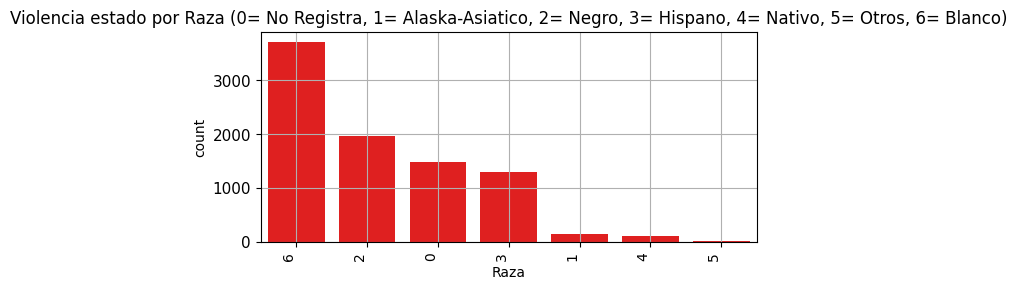

In [ ]:
ax3=plt.subplot(grid[1])
sns.countplot(data=df,x="Raza",order=df["Raza"].value_counts().index,ax=ax3,color="r")

ax3.set_title("Violencia estado por Raza (0= No Registra, 1= Alaska-Asiatico, 2= Negro, 3= Hispano, 4= Nativo, 5= Otros, 6= Blanco)", fontsize= 'large')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90,ha="right")
plt.yticks(fontsize= 11)

ax3.grid()
plt.show()

<ipython-input-59-9b51b311e5cc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


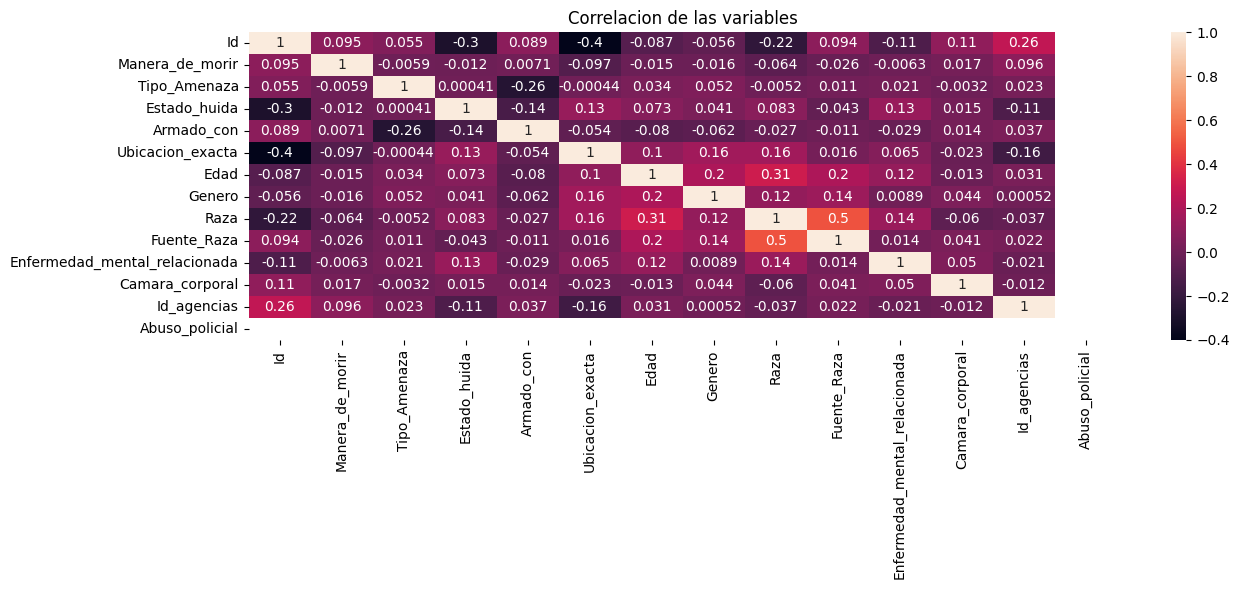

In [ ]:
##Se revisa la correlacion de los datos para determinar que columnas se pueden eliminar

plt.figure(figsize=(14, 4))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlacion de las variables")
plt.show()

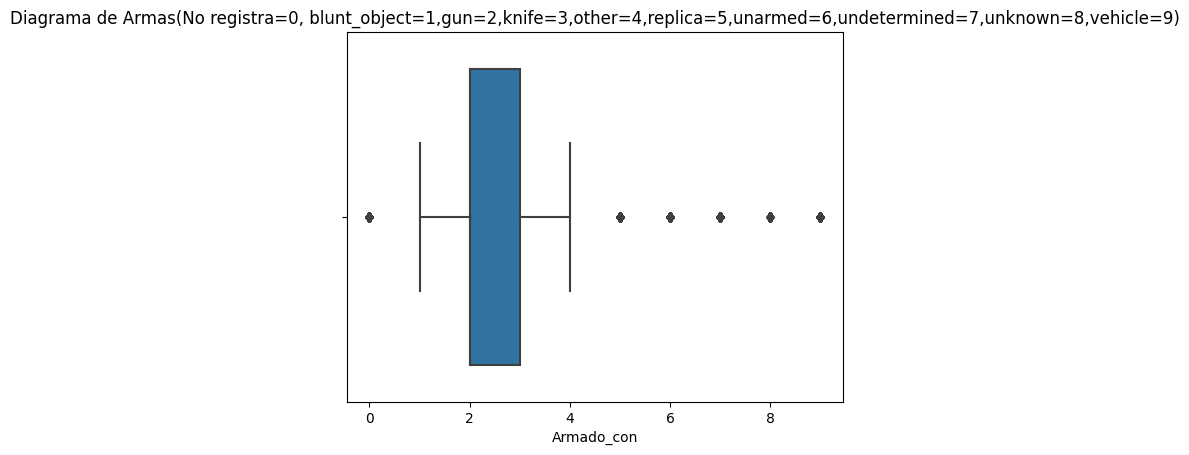

In [ ]:
sns.boxplot(x=df['Armado_con'])
plt.xlabel('Armado_con')
plt.title('Diagrama de Armas(No registra=0, blunt_object=1,gun=2,knife=3,other=4,replica=5,unarmed=6,undetermined=7,unknown=8,vehicle=9)')
plt.show()

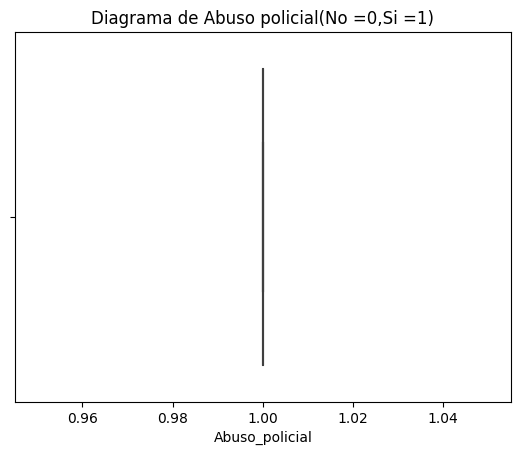

In [ ]:
sns.boxplot(x=df['Abuso_policial'])
plt.xlabel('Abuso_policial')
plt.title('Diagrama de Abuso policial(No =0,Si =1)')
plt.show()

In [ ]:
#Se realiza el borrado de algunas columnas que se consideran no necesarias para el ML

df.drop(['Id','Nombre','Manera_de_morir','Latitud', 'Longitud'], axis=1)
df.dropna(subset=["Raza"], inplace=True)

In [ ]:
#Se adiciona una columna poblacion total con respecto a la raza
condiciones = [df["Raza"]==0, df["Raza"]==1, df["Raza"]==6, df["Raza"]==3, df["Raza"]==2, df["Raza"]==4, df["Raza"]==5]
cifras = [0, 14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

df["poblacion_total"] = np.select(condiciones, cifras, default="zero")

df.head()

,Id,Fecha,Nombre,Manera_de_morir,Tipo_Amenaza,Estado_huida,Armado_con,Ciudad,Condado,Estado,...,Edad,Genero,Raza,Fuente_Raza,Enfermedad_mental_relacionada,Camara_corporal,Id_agencias,Nombre_agencia,Abuso_policial,poblacion_total
0,3,2015-02-01,Tim Elliot,1,5,3,2,Shelton,Mason,WA,...,53,2,1,2,1,0,73,Allegheny County Port Authority,1,14674252
1,4,2015-02-01,Lewis Lee Lembke,1,5,3,2,Aloha,Washington,OR,...,47,2,6,2,0,0,70,Alleghany County Sheriff's Office,1,223553265
2,5,2015-03-01,John Paul Quintero,2,4,3,6,Wichita,Sedgwick,KS,...,23,2,3,2,0,0,238,Austin Police Department,1,50477594
3,8,2015-04-01,Matthew Hoffman,1,5,3,5,San Francisco,San Francisco,CA,...,32,2,6,2,1,0,196,Assumption Parish Sheriff's Office,1,223553265
4,9,2015-04-01,Michael Rodriguez,1,5,3,4,Evans,Weld,CO,...,39,2,3,2,0,0,473,Bloomingdale Police Department,1,50477594


Text(0.5, 1.0, 'Total de personas muertas por su Raza-0= No Registra, 1= Alaska-Asiatico, 2= Negro, 3= Hispano, 4= Nativo, 5= Otros, 6= Blanco')

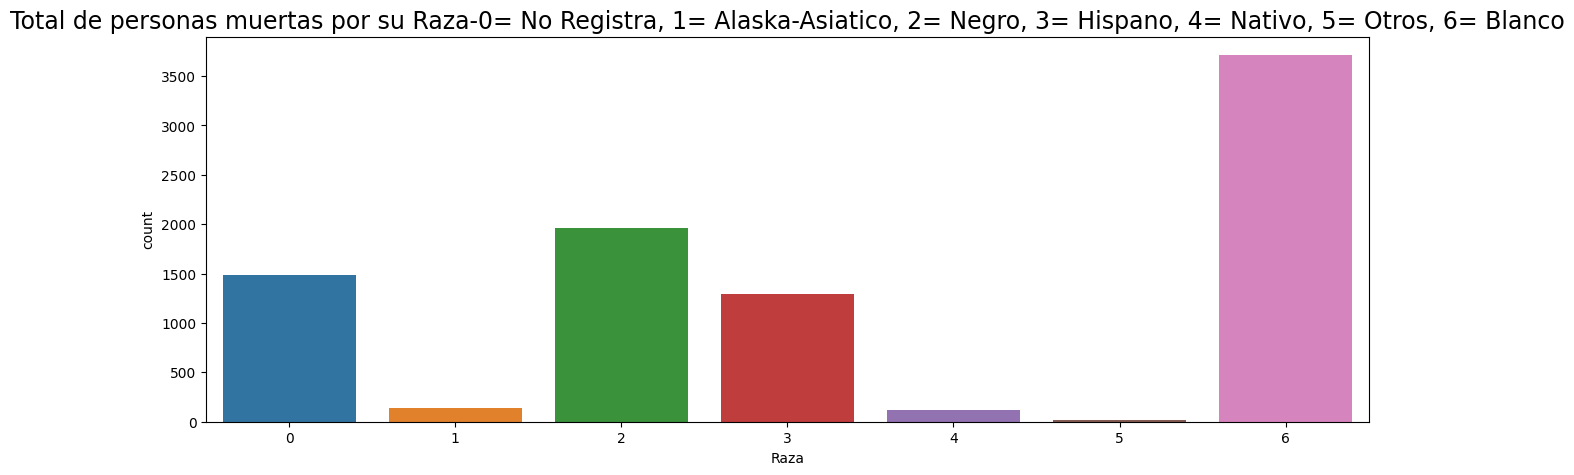

In [ ]:
#Se valida las muertes por raza
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="Raza")

plt.title("Total de personas muertas por su Raza-0= No Registra, 1= Alaska-Asiatico, 2= Negro, 3= Hispano, 4= Nativo, 5= Otros, 6= Blanco", fontsize=17)

In [ ]:
#lista de personas muertas por raza
raza = [0,1,2,3,4,5,6]
personas_muertas_raza = []

for i in raza:
    i_muertes = df.Raza.loc[(df.Raza==i)].count()
    personas_muertas_raza.append(i_muertes)

print (personas_muertas_raza)

[1481, 142, 1961, 1293, 116, 21, 3713]


<ipython-input-66-3e82a2ffb041>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist_edad = sns.distplot(df["Edad"], bins=40)


Text(0.5, 1.0, 'Distribucion de edades')

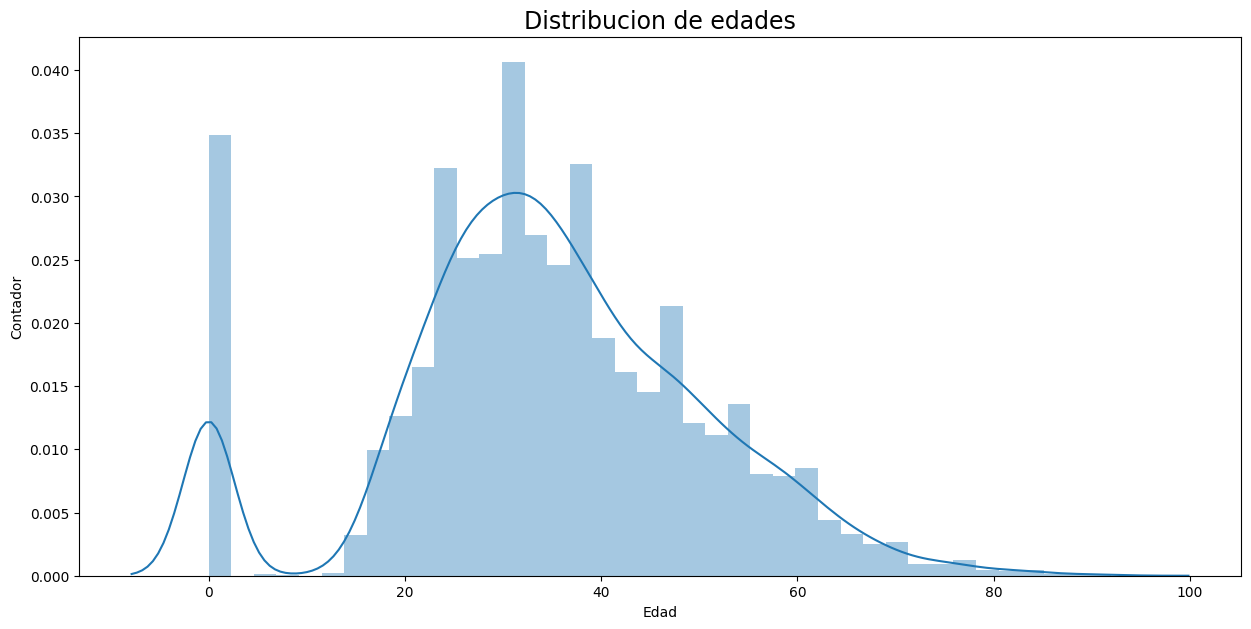

In [ ]:
#Muerte por edades
plt.figure(figsize=(15,7))
dist_edad = sns.distplot(df["Edad"], bins=40)
dist_edad.set(xlabel="Edad", ylabel="Contador")

plt.title("Distribucion de edades", fontsize=17)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Distribucion de edad por Raza')

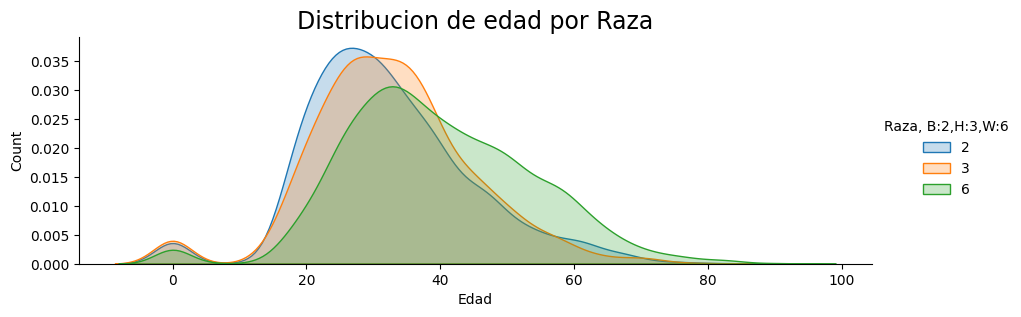

In [ ]:
#Comparacion de  edades de negros, blancos e hispanos, B:2,H:3,W:6

three_races = df.loc[(df["Raza"] == 2) | (df["Raza"] == 6) | (df["Raza"] == 3)]

g = sns.FacetGrid(data=three_races, hue="Raza", aspect=3)
g.map(sns.kdeplot, "Edad", shade=True)
g.add_legend(title="Raza, B:2,H:3,W:6")


g.set_ylabels("Count")
plt.title("Distribucion de edad por Raza", fontsize=17)

In [ ]:
#Mostrar las ciudades mas peligrosas del dataset

ciudad = df.Ciudad.value_counts(ascending=False)

df_ciudad = df.filter(["Ciudad"], axis=1)
df_ciudad["count"] = 1

grupo_ciudad = df_ciudad.groupby("Ciudad", as_index=False,sort=False).sum()
grupo_ciudad.sort_index(ascending=False)

ciudades_agrupadas = grupo_ciudad.sort_values("count", ascending=False).head(8)

plt.figure(figsize=(15,8))
sns.barplot(data=ciudades_agrupadas, x="Ciudad", y="count")
plt.title("Ciudades mas peligrosas", fontsize=17)

In [ ]:
#Se incorpora un mapa de EEUU con sus respectivos condados
%%HTML
<div class='tableauPlaceholder' id='viz1504205405904' style='position: relative'>
  <noscript>
    <a href='#'>
      <img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1_rss.png' style='border: none' />
    </a>
  </noscript>
  <object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
    <param name='path' value='views&#47;InteractivePoliceKillingsMap&#47;Sheet1?:embed=y&amp;:display_count=y&amp;publish=yes' />
    <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1.png' />
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    <param name='filter' value='publish=yes' />
  </object>
</div>

<script type='text/javascript'>
  var divElement = document.getElementById('viz1504205405904');
  var vizElement = divElement.getElementsByTagName('object')[0];
  vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
  var scriptElement = document.createElement('script');
  scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
  vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

Text(0.5, 1.0, 'Arma mas comun- vacio=0, objeto_contundente =1, pistola=2, cuchillo=3, otro=4, réplica=5, desarmado=6, indeterminado=7, desconocido=8, vehículo=9')

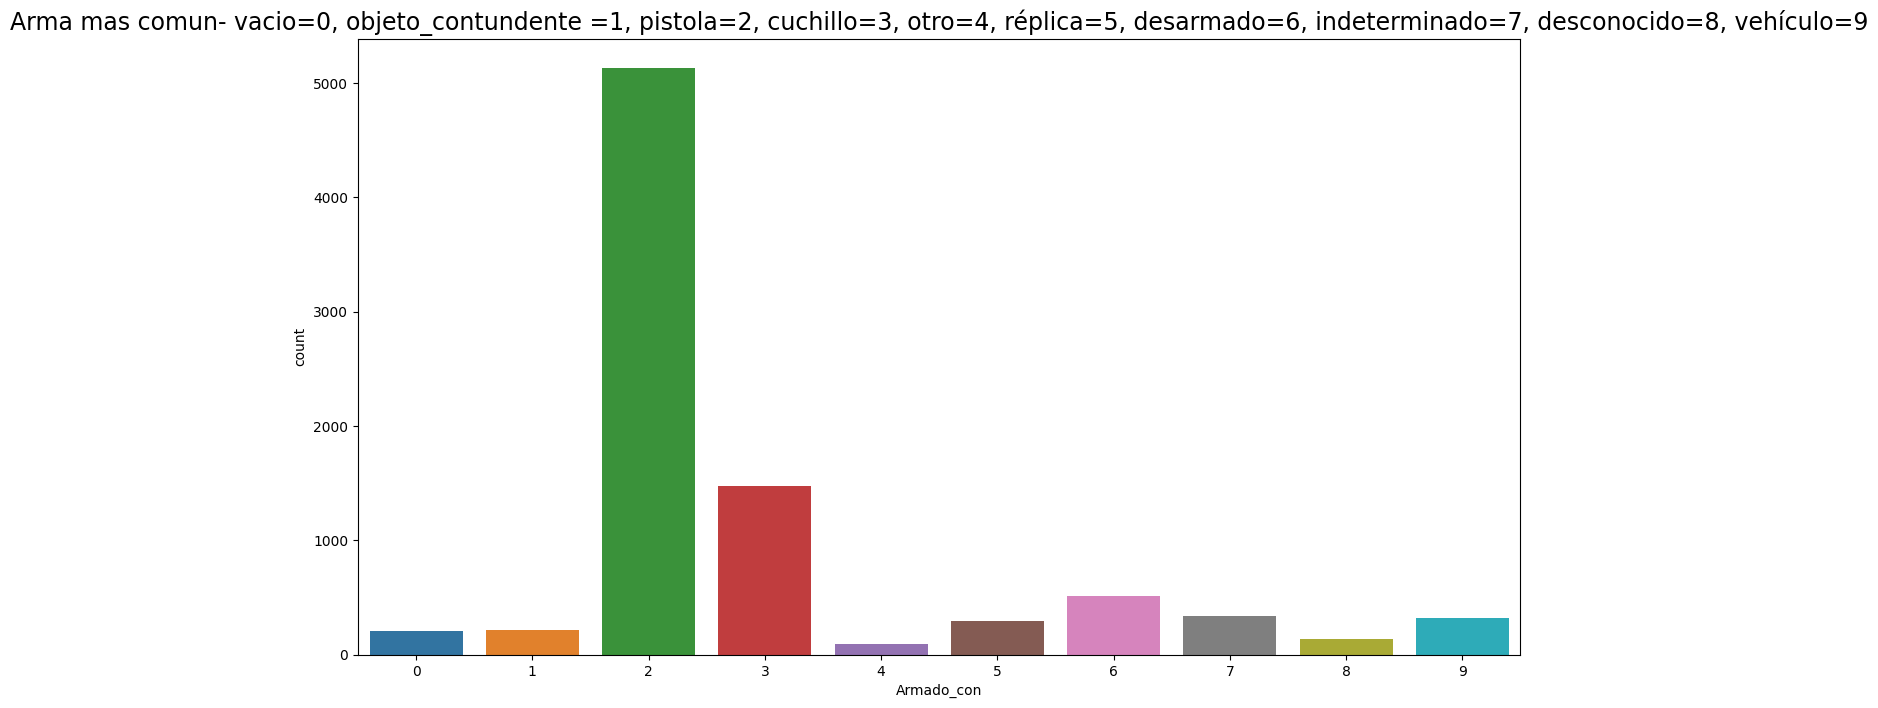

In [ ]:
#Arma mas comun

arma = df.Armado_con.value_counts(ascending=False)

df_armado = df.filter(["Armado_con"], axis=1)
df_armado["count"] = 1

armado_agrupado = df_armado.groupby("Armado_con", as_index=False,sort=False).sum()
armado_agrupado.sort_index(ascending=False)

grouped_armed = armado_agrupado.sort_values("count", ascending=False).head(8)

plt.figure(figsize=(15,8))
sns.barplot(data=armado_agrupado, x="Armado_con", y="count")
plt.title("Arma mas comun- vacio=0, objeto_contundente =1, pistola=2, cuchillo=3, otro=4, réplica=5, desarmado=6, indeterminado=7, desconocido=8, vehículo=9", fontsize=17)

# **Posible Solución**

Para darle a solucion a esta problematica, se propone usar el modelo de machine learning: Regresion Logistica, porque nuestra intencion es de clasificacion binaria por ejemplo, si la muerte estuvo o no relacionada con la policía.

# **Aplicación de la solución Regresion Logistica**

In [ ]:
df.drop(['Fecha','Nombre','Ciudad','Condado','Estado','Latitud','Longitud','Nombre_agencia'], axis=1, inplace= True)

In [ ]:
df.head()

,Id,Manera_de_morir,Tipo_Amenaza,Estado_huida,Armado_con,Ubicacion_exacta,Edad,Genero,Raza,Fuente_Raza,Enfermedad_mental_relacionada,Camara_corporal,Id_agencias,Abuso_policial,poblacion_total
0,3,1,5,3,2,4,53,2,1,2,1,0,73,1,14674252
1,4,1,5,3,2,4,47,2,6,2,0,0,70,1,223553265
2,5,2,4,3,6,4,23,2,3,2,0,0,238,1,50477594
3,8,1,5,3,5,4,32,2,6,2,1,0,196,1,223553265
4,9,1,5,3,4,4,39,2,3,2,0,0,473,1,50477594


In [ ]:
y = df['Manera_de_morir']
X = df.drop('Manera_de_morir', axis=1)

# Suponiendo que X es tu conjunto de datos y y es tu variable objetivo (todos True)
# Si X contiene solo características numéricas, normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo One-Class SVM
modelo = OneClassSVM(kernel='rbf', nu=0.5)  # 'nu' es un hiperparámetro que puedes ajustar
modelo.fit(X_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Las predicciones serán 1 para instancias inliers (que se ajustan al modelo) y -1 para outliers
# Convertir las predicciones a True (1) y False (0)
predicciones_bool = (predicciones == 1)

# Evaluar el modelo
print("Informe de Clasificación:")
print(classification_report(y_test, predicciones_bool))

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.52      0.67      1625
           2       0.00      0.00      0.00       121

    accuracy                           0.49      1746
   macro avg       0.31      0.17      0.22      1746
weighted avg       0.87      0.49      0.63      1746



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
df

,Id,Manera_de_morir,Tipo_Amenaza,Estado_huida,Armado_con,Ubicacion_exacta,Edad,Genero,Raza,Fuente_Raza,Enfermedad_mental_relacionada,Camara_corporal,Id_agencias,Abuso_policial,poblacion_total
0,3,1,5,3,2,4,53,2,1,2,1,0,73,1,14674252
1,4,1,5,3,2,4,47,2,6,2,0,0,70,1,223553265
2,5,2,4,3,6,4,23,2,3,2,0,0,238,1,50477594
3,8,1,5,3,5,4,32,2,6,2,1,0,196,1,223553265
4,9,1,5,3,4,4,39,2,3,2,0,0,473,1,50477594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9474,2,7,2,2,3,0,2,0,0,0,1,21,1,0
8723,9475,2,2,3,8,1,0,2,0,0,0,0,354,1,0
8724,9476,2,0,0,7,2,0,2,0,0,0,0,354,1,0
8725,9477,2,6,2,2,3,28,2,0,0,0,0,1525,1,0


In [ ]:
y = df['Abuso_policial']
X = df.drop('Abuso_policial', axis=1)


# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Normalizar las características
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Inicializar y entrenar el modelo de regresión logística
#modelo = LogisticRegression()
modelo = OneClassSVM(kernel='rbf', nu=0.05)
modelo.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predicciones)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Mostrar un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y_test, predicciones))

Precisión del modelo: 94.23%
Informe de Clasificación:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      2619

    accuracy                           0.94      2619
   macro avg       0.50      0.47      0.49      2619
weighted avg       1.00      0.94      0.97      2619



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
